In [30]:
import scipy
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import wave
from scipy.io import wavfile
from scipy import signal
import sounddevice as sd
from signal_processor import SignalProcessor

Sampling Rate of Original WAV file: 48000 Hz
Coverted from Stereo to Mono
Audio Normalized


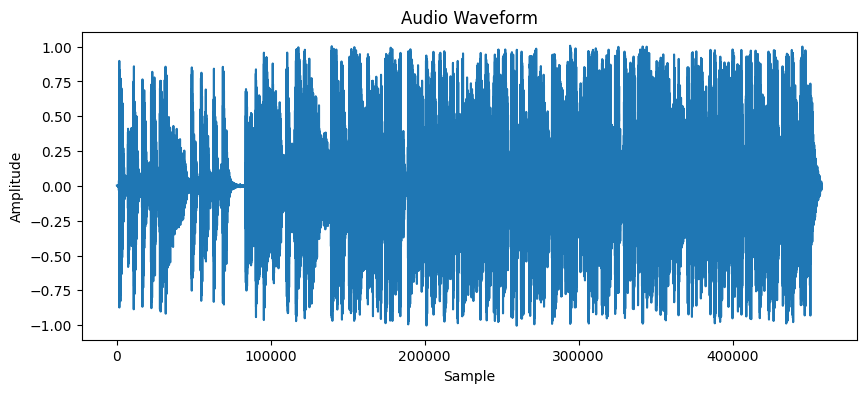

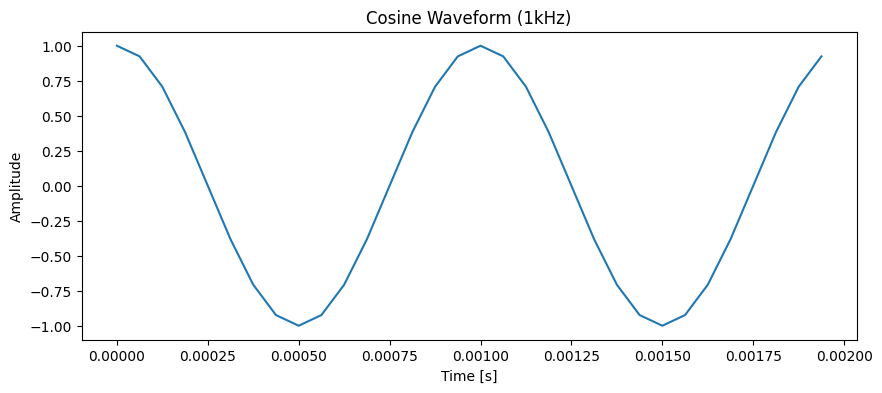

In [32]:
audio = '03-laufey-from-the-start.wav'
processor = SignalProcessor(audio)
processor.process()
processor.resample_audio()

In [53]:
import numpy as np
import scipy.signal

# Fixed number of frequency bands
num_bands = 8
low_freq = 100
high_freq = 8000

# Calculate logarithmically spaced frequencies
log_freqs = np.logspace(np.log10(low_freq), np.log10(high_freq), num_bands + 1)

filters = []
for i in range(num_bands):
    band = [log_freqs[i]/(processor.sample_rate/2), log_freqs[i+1]/(processor.sample_rate/2)]
    # Assume you have already defined the sample rate in your processor
    sos = scipy.signal.butter(N=8, Wn=band, btype='bandpass', fs=processor.sample_rate, output = 'sos')
    filters.append(sos)


In [54]:
sos_filtered_signals = []

for sos in filters:
    # Apply the SOS filter to the audio signal
    filtered_signal = scipy.signal.sosfilt(sos, processor.audio_data)
    sos_filtered_signals.append(filtered_signal)

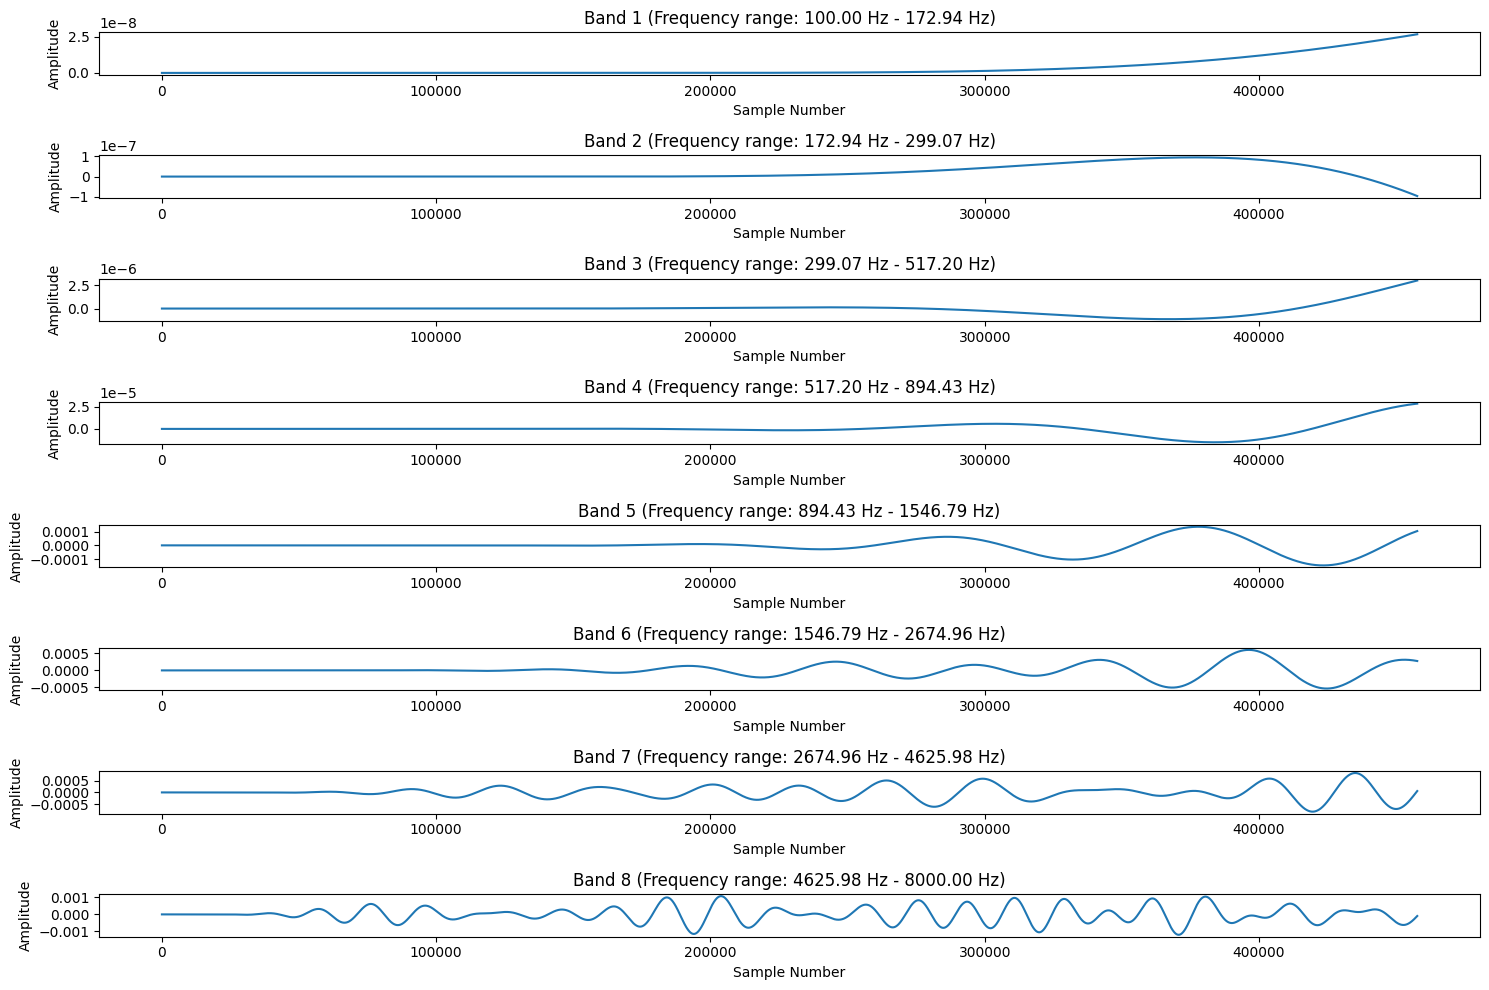

In [55]:
import matplotlib.pyplot as plt

# Create a figure for subplots
plt.figure(figsize=(15, 10))

# Iterate over each filtered signal and plot
for i, filtered_signal in enumerate(sos_filtered_signals):
    # Create a subplot for each filtered signal
    plt.subplot(num_bands, 1, i+1)

    # Plot the filtered signal
    plt.plot(filtered_signal)
    plt.title(f'Band {i+1} (Frequency range: {log_freqs[i]:.2f} Hz - {log_freqs[i+1]:.2f} Hz)')
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


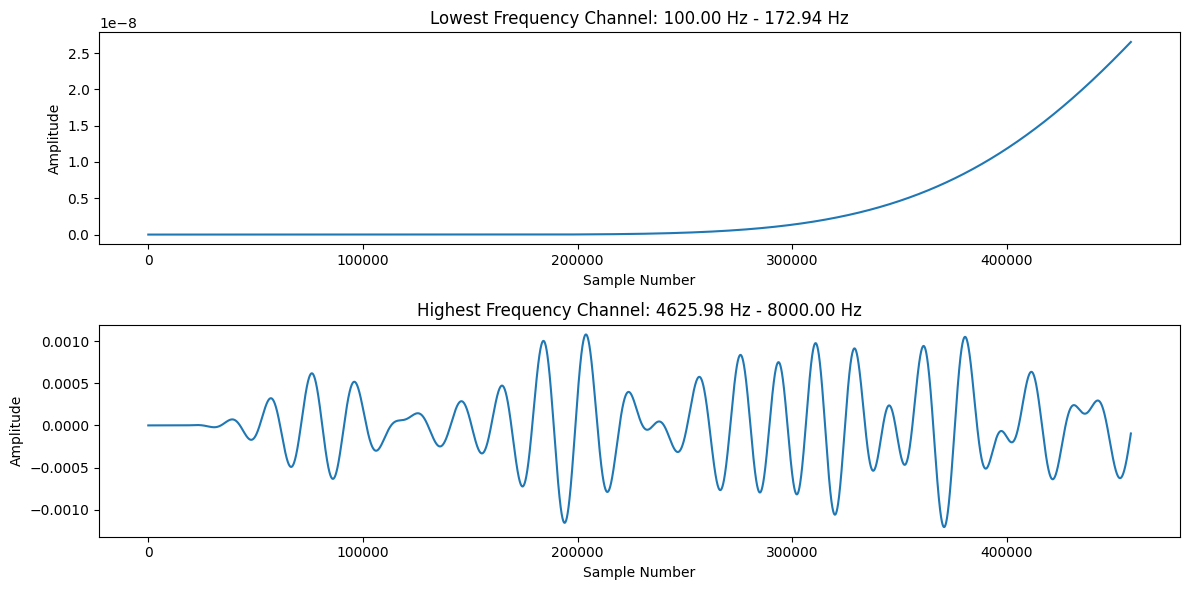

In [56]:
import matplotlib.pyplot as plt

# Assuming sos_filtered_signals[0] is the lowest and sos_filtered_signals[-1] is the highest frequency band
lowest_freq_signal = sos_filtered_signals[0]
highest_freq_signal = sos_filtered_signals[-1]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for the lowest frequency channel
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(lowest_freq_signal)
plt.title(f'Lowest Frequency Channel: {log_freqs[0]:.2f} Hz - {log_freqs[1]:.2f} Hz')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

# Plot for the highest frequency channel
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(highest_freq_signal)
plt.title(f'Highest Frequency Channel: {log_freqs[-2]:.2f} Hz - {log_freqs[-1]:.2f} Hz')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()
